# Kings County Housing Prices Bakeoff

In [16]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline

## Step 1: Read in the Data

In [17]:
# Read in CSV and drop unneeded columns
df = pd.read_csv('kc_house_data_train.csv')
df = df.drop(columns=['Unnamed: 0', 'id'])

# View all columns
pd.set_option('display.max_columns', 25)

In [18]:
# FORMATTING DATE: adding year, month, and day columns
df['date'] = df['date'].str.slice(0, 8, 1)
df['year_sold'] = df['date'].str.slice(0, 4, 1)
df['month_sold'] = df['date'].str.slice(4, 6, 1)
df['day_sold'] = df['date'].str.slice(6, 8, 1)
df['date_sold'] = df['year_sold'] + '-' + df['month_sold'] + '-' + df['day_sold']

In [19]:
# Adjusting dtypes and dropping original data column
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['year_sold'] = df['year_sold'].astype('int64')
df['month_sold'] = df['month_sold'].astype('int64')
df['day_sold'] = df['day_sold'].astype('int64')
df = df.drop(columns='date')

In [20]:
# replace 0 with null so it doesnt think zero is a year

# unsure if i want to do this
df['yr_renovated'] = df['yr_renovated'].replace(0, np.NaN)

In [21]:
df.waterfront.value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [22]:
df.isnull().sum()

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     16564
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
year_sold            0
month_sold           0
day_sold             0
date_sold            0
dtype: int64

In [23]:
df[df.bedrooms == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,date_sold
8597,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,NaN,98103,47.6878,-122.331,1330,4700,2014,6,25,2014-06-25


In [24]:
# updating incorrect value
df.at[8597,'bedrooms']= 3

## Step 2: Exploratory Data Analysis
Become familiar with the data. Look to see if there are any extreme values.

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.

In [25]:
lr_model = ols(formula='price~bedrooms', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1888.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:19:25   Log-Likelihood:            -2.4547e+05
No. Observations:               17290   AIC:                         4.909e+05
Df Residuals:                   17288   BIC:                         4.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.078e+05   1.03e+04     10.439      0.000    8.75e+04    1.28e+05
bedrooms    1.285e+05   2956.265     43.451      0.000    1.23e+05    1.34e+05
==============================================================================
Omnibus:                    15896.546   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1153560.178
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      42.121   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

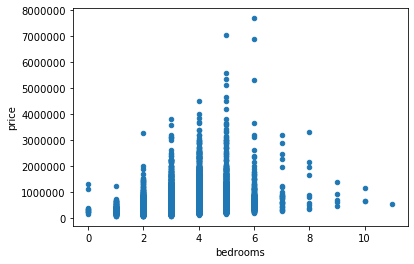

In [28]:
df.plot.scatter(x='bedrooms', y='price');

## Step 3: Clean up any issues (extreme values, etc.) with the data.
Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it.

## Step 4: Generate new features that you think could be important.
After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

### 4.3) There are columns for when the house was built and when it was renovated. How could you use these columns to create a new column?

### Non-linear transformations
### 4.4) Create a polynomial feature for two of your continuous variables.

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

## Step 5: Train-Test Split
If you plan on doing any scaling of your data, make sure it is done at the appropriate time.

### 5.1) Perform a train-test split of the data.

### 5.2) Fit your scaler to training the data.

### 5.3) Transform the testing set with the scaler.

### 5.4) Fit the model to the training data.

### 5.5) Use the model to predict on the training set and the test set.

### 5.6) Evaluate the training and test predictions using RMSE.

### 5.7) Determine if your model is overfit.

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8: Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/